In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
from robingrad.optim import Adam
from robingrad.state import get_parameters
from sklearn.datasets import make_moons
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
print(X.shape, type(X))
print(y.shape, type(y))

(100, 2) <class 'numpy.ndarray'>
(100,) <class 'numpy.ndarray'>


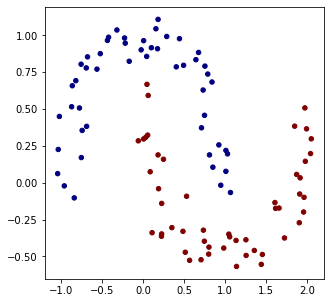

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True).reshape((100,1))
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (100, 2)
<class 'robingrad.tensor.Tensor'> (100, 1)


In [5]:
class RobinNet:
    def __init__(self):
        self.l1 = nn.Linear(2,16)
        self.l2 = nn.Linear(16,16)
        self.l3 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        x = x.relu()
        x = self.l3(x)
        return x

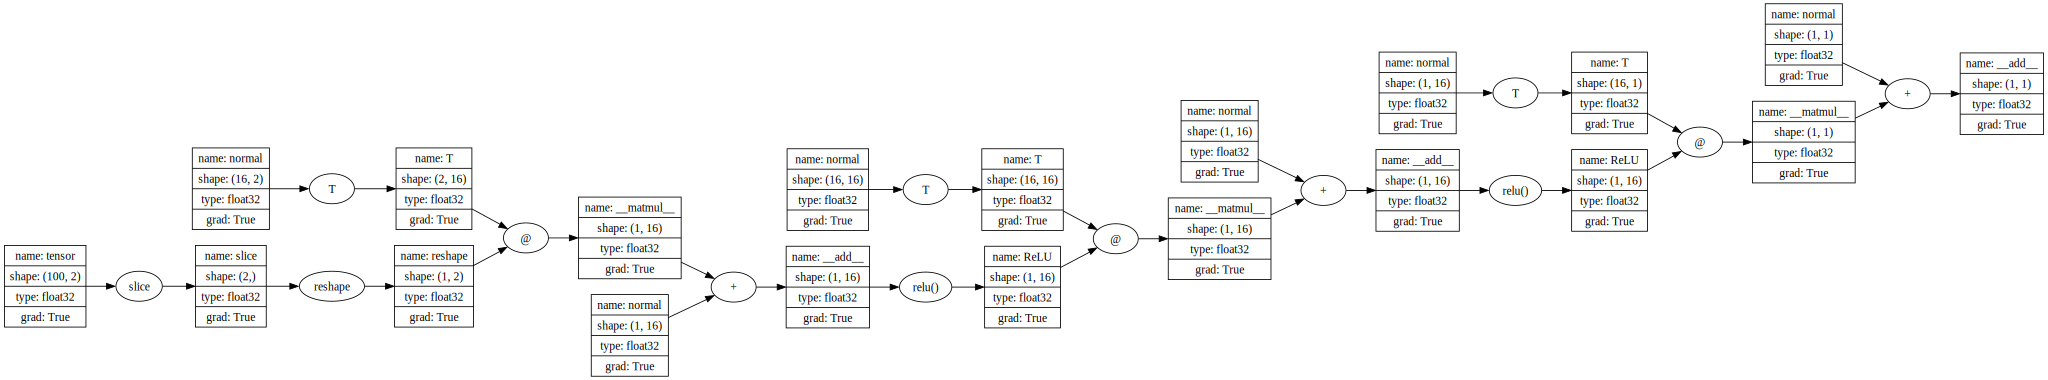

In [6]:
model = RobinNet()
res = model(X_train[0].reshape((1,2)))
draw_dot(res)

In [7]:
params = get_parameters(model)
opt = Adam(params)
loss = nn.BCELoss()

In [8]:
def accuracy_val(y_pred, y_true):
    y_pred = np.array(y_pred).round()
    correct_results = np.sum(y_pred == y_true)
    acc = correct_results/y_true.shape[0]
    acc = np.round(acc * 100)
    return acc

In [9]:
batch_size = 8
epochs = 200
num_batches = int(np.ceil(X_train.shape[0] / batch_size))
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        batch_X = X_train[start_idx:end_idx]
        batch_y = y_train[start_idx:end_idx]
        output = model(batch_X).sigmoid()
        y_pred.extend(output.data.squeeze())
        bce_losses = loss(output=output, target=batch_y)
        losses.append(float(bce_losses.data))
        opt.zero_grad()
        bce_losses.backward()
        opt.step()
    e = time.monotonic()
    t = e - s
    acc = accuracy_val(y_pred=y_pred, y_true=y)
    loss_epoch = sum(losses)/len(losses)
    if epoch % 10 == 0 or epoch==(epochs-1):
        print(f"epoch: {epoch} |", f"loss: {loss_epoch:.2f} |", f"accuracy: {acc} |", f"time: {t:.2f} sec.")


epoch: 0 | loss: 2.92 | accuracy: 50.0 | time: 0.02 sec.
epoch: 10 | loss: 0.62 | accuracy: 75.0 | time: 0.01 sec.
epoch: 20 | loss: 0.41 | accuracy: 81.0 | time: 0.04 sec.
epoch: 30 | loss: 0.31 | accuracy: 82.0 | time: 0.01 sec.
epoch: 40 | loss: 0.26 | accuracy: 90.0 | time: 0.01 sec.
epoch: 50 | loss: 0.18 | accuracy: 95.0 | time: 0.01 sec.
epoch: 60 | loss: 0.15 | accuracy: 96.0 | time: 0.01 sec.
epoch: 70 | loss: 0.11 | accuracy: 97.0 | time: 0.01 sec.
epoch: 80 | loss: 0.09 | accuracy: 97.0 | time: 0.01 sec.
epoch: 90 | loss: 0.08 | accuracy: 99.0 | time: 0.01 sec.
epoch: 100 | loss: 0.06 | accuracy: 100.0 | time: 0.02 sec.
epoch: 110 | loss: 0.06 | accuracy: 100.0 | time: 0.01 sec.
epoch: 120 | loss: 0.05 | accuracy: 100.0 | time: 0.01 sec.
epoch: 130 | loss: 0.04 | accuracy: 100.0 | time: 0.01 sec.
epoch: 140 | loss: 0.03 | accuracy: 100.0 | time: 0.01 sec.
epoch: 150 | loss: 0.03 | accuracy: 100.0 | time: 0.01 sec.
epoch: 160 | loss: 0.03 | accuracy: 100.0 | time: 0.01 sec.
e